<a href="https://colab.research.google.com/github/JaoSaraiva/-Engenhando-com-Dados/blob/main/deep_learn_engjao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#carregando o dataset
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [9]:
#explorando os dados
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

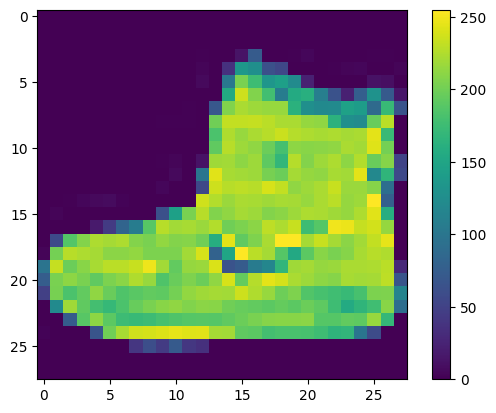

In [10]:
#exibindo os dados
total_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']
'''
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
    plt.subplots_adjust(hspace=0.2, wspace=0.5)
'''
plt.imshow(imagens_treino[0])
plt.colorbar()

In [11]:
#processo de Normalização
imagens_treino = imagens_treino/float(255)

In [5]:
#modelo sequencia
   #entrada (camada 0)
   #processamento (camada 1)
   #saida (camada 2)

modelo = keras.Sequential([
    #rede neural:
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu), #este número 256 é aleatório e deve ser múltiplo de 2. Eles são responsáveis pelas comunicações profundas entre as camadas da rede neural. 'nn' é tradução de redes neurais
    keras.layers.Dropout(0.2), #deixando 20% adormecido (técnica para melhorar nossas validações)
    #keras.layers.Dense(128, activation = tensorflow.nn.relu),
    #keras.layers.Dense(64, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax) #10 é o número de classificações que temos
])

Finalizamos a criação do nosso modelo. Nosso modelo de deep learning possui várias camadas(multilayers). Agora vamos treiná-lo. Mas, antes precisamos compilar.

In [15]:
adam = keras.optimizers.Adam(lr=0.001) #lr: learning rate: taxa de aprendizagem quanto maior o número maior a perda e menor acurácia.

In [19]:
#monitora o modelo para n ficarmos precisando fazer gráficos para comparações e quando ele percebe que n adianta ficar fazendo mais épocas pois n irá evoluir o modelo, ele para automaticamente
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'),
             keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5', monitor='val_loss', save_best_only=True)] #callbacks.ModelCheckpoint separa as melhores configurações que vc dita para ele

In [20]:
modelo.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2, callbacks=callbacks) #substituímos o 5 por 30. Vimos que a melhor opção é a 5.
#batch_size = 480 (48000 /100) este número de parâmetro dá menos informações
#por vez ao modelo ajudando a diminuir o tempo de rodagem de cada época, resumindo treina o modelo mais rápido, consequentemente, melhora os cálculos de pesos e vieses.
#Mas n necessariamente tem eficiência com a acurácia e perdas.
#Quando usamos o batch_size e ele tende a ter loss e acc ruins, manipulamos o lr. Ao rodar o modelo, verificamos que temos um excelente retorno do mesmo. Então, pode ser uma excelente solução.

Epoch 1/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2188 - accuracy: 0.9160 - val_loss: 0.3171 - val_accuracy: 0.8941
Epoch 2/5
  38/1500 [..............................] - ETA: 6s - loss: 0.1985 - accuracy: 0.9293

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 8s 6ms/step - loss: 0.2177 - accuracy: 0.9175 - val_loss: 0.3384 - val_accuracy: 0.8867


Nesta saída observamos que tivemos bastante perdas (loss: 12.2693). Vamos tentar diminuir ao máximo essas perdas. Observamos que para melhorar as perdas, podemos deixar as cores menos variáveis, afinal, temos uma escala de mais ou menos 0 a 255 cores e queremos reduzir para 0 a 1. Para isso vamos fazer alterações nas nossas linhas de código assima: 'imagens_treino = imagens_treino/float(255)'.
Após rodar o código observamos que nossa perda reduziu drasticamente para 0.4799.

Agora vamos tentar mais melhoramentos do nosso modelo. Afunilando as camadas densas. Temos 256 para 10. Vamos voltar ao código e acrescentar mais uma camada para executação do nosso propósito. Após adicionarmos mais camadas, vimos que para este modelo não é o ideal pois está aumentando as perdas. Então, vamos continuar da forma que está.

Agora vamos treinar nosso modelo mais vezes para melhorar ainda mais essas perdas: 'epochs=5'. Observamos que melhorando ainda mais nosso modelo com uma perda de apenas 0.2674!

Após vermos e analisarmos nossas perdas, vamos verificar o quanto o modelo está ganhando/acertando: 'metrics=['accuracy']'. Observamos que nossa acurácia está em ascensão, então estamos indo bem com nosso modelo.

Após esse treinamento no modelo (modelo.fit), vamos fazer a predição ou testes e vamos verificar como ele está se adaptando à dados novos (modelo.predict).

In [ ]:
#resumo do modelo
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#zerandos os pesos
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])
'''
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])

modelo.layers[1].get_weights()


[array([[0.2740623 , 0.45766282, 0.09729987, ..., 0.6361702 , 0.38006085,
         0.21990013],
        [0.05886537, 0.83376944, 0.7684522 , ..., 0.98866194, 0.4215903 ,
         0.05537025],
        [0.9157184 , 0.91034114, 0.11557064, ..., 0.53412384, 0.6263726 ,
         0.6287747 ],
        ...,
        [0.48578462, 0.52383167, 0.850647  , ..., 0.7431174 , 0.27206275,
         0.6633255 ],
        [0.29703856, 0.10170612, 0.15559334, ..., 0.10845103, 0.52382964,
         0.09032223],
        [0.7629639 , 0.34904414, 0.95690304, ..., 0.479996  , 0.9356486 ,
         0.8331291 ]], dtype=float32),
 array([ 0.07876888, -0.01931808,  0.04634396, -0.01182395,  0.40503913,
        -0.01046869,  0.24786316,  0.1649153 ,  0.2476673 , -0.01013609,
         0.24050836, -0.0123611 ,  0.09106288, -0.04989163, -0.03544729,
         0.24670401, -0.37850857, -0.01313706,  0.08326332, -0.17827368,
         0.38786548,  0.30363432,  0.11241002,  0.14254686, -0.23846793,
         0.3070631 , -0.07684

In [ ]:
#após zerar os pesos e deixar os vieses iguais, agora rodamos/treinamos o modelo
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 12.1336 - accuracy: 0.3659 - val_loss: 4.0171 - val_accuracy: 0.5039
Epoch 2/5
1500/1500 [==============================] - 11s 7ms/step - loss: 4.0935 - accuracy: 0.5499 - val_loss: 3.3975 - val_accuracy: 0.6345
Epoch 3/5
1500/1500 [==============================] - 8s 6ms/step - loss: 2.9503 - accuracy: 0.6372 - val_loss: 2.2091 - val_accuracy: 0.6570
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 1.8909 - accuracy: 0.6995 - val_loss: 1.5581 - val_accuracy: 0.7000
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 1.3323 - accuracy: 0.7435 - val_loss: 0.8712 - val_accuracy: 0.8133


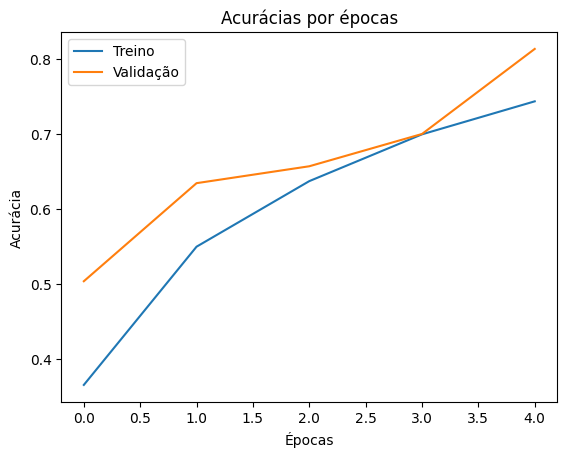

In [ ]:
#agora geraremos os gráficos para melhor entendimento do modelo
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácias por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

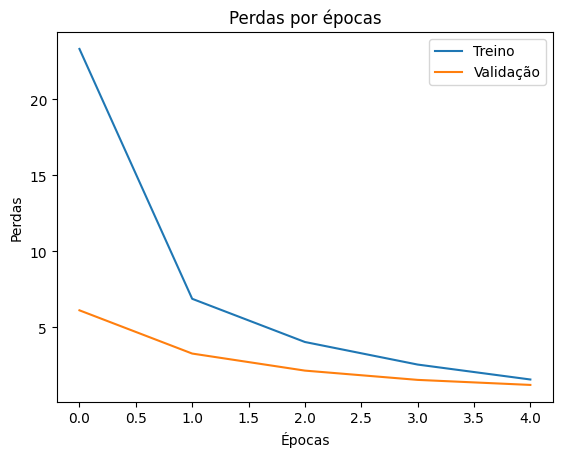

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino', 'Validação'])

Aqui observamos que nossa rede continua com uma má performance. Isso acontece pq ela está simétrica. No proximo passo iremos dar uma melhoramento dela fazendo sua assimetria deixando os pesos aleatórios.

In [ ]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [ ]:
vieses_camada_dense_zerados = np.zeros((256,))
#treinando o modelo com os vieses e os pesos zerados
#modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense_zerados])
#treianando o modelo com os vieses zerados com o pesos randomicos
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense_zerados])

In [ ]:
#salvando modelo após treinado e validado. Vai ser salvo em htf5(h5)
from tensorflow.keras.models import load_model

modelo.save('modelo_epochs5_nos3.h5')
modelo_salvo = load_model('modelo_epochs5_nos3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
testes = modelo.predict(imagens_teste)
#testes[0]
print('Resultado de teste:', np.argmax(testes[0]))
print('Número da imagem de teste:', identificacoes_teste[0])

#Após salvar o modelo, vamos carregar aqui para usarmos. Com a saída que vamos obter verificamos que otimizamos, salvamos e que está tudo certo com nosso modelo.
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado de teste modelo salvo:', np.argmax(testes_modelo_salvo[0]))
print('Número da imagem de teste:', identificacoes_teste[0])

313/313 [==============================] - 1s 3ms/step
Resultado de teste: 9
Número da imagem de teste: 9
313/313 [==============================] - 1s 3ms/step
Resultado de teste modelo salvo: 5
Número da imagem de teste: 9


Para saber o resultado deste teste (ou saber se acertamos ou erramos) temos que pegar o maior número 'np.argmax(testes[0])'. Acima vimos que ele está com bastante acertividade. Mudamos os números entre colchetes e obtivemos os mesmo resultados de teste e real.

Mas, ele pode errar, então, vamos verificar quantas vezes ele acertou e quantas vezes ele errou (ou quanto teve de acurácia ou perdeu):

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda de teste:', perda_teste)
print('Acurácia de teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 320.3728 - accuracy: 0.7520
Perda de teste: 320.372802734375
Acurácia de teste: 0.7519999742507935


Observamos que nossa perda e acurácia estão péssimas. Então, precisamos fazer ajustes no nosso modelo. Vamos ajustar passando dados de validação (assegurar os novos dados que entram), pois até agora só asseguramos dados de treino e teste e assim tentar reduzir esse status ruim que obtivemos. Vamos deixar 20% de validação la no fit: 'validation_split=0.2'.
Após rodar a célula, vimos que nosso output veio com mais informações, as val_loss e val_accuracy. Para entendermos essas informações, vamos passar para um gráfico. Desta forma vamos salvar o nosso modelo.fit em uma variável chamada historico.

In [ ]:
historico.history
#na saída observamos que entrega um dicionário com os valores das 5 épocas. Então vamos visualizar como nosso modelo tá indo
#nos dados de treino e validação através de gráfico para melhor compreensão.

{'loss': [85.49964904785156,
  23.061859130859375,
  10.547414779663086,
  5.369117736816406,
  2.8919644355773926],
 'accuracy': [0.41502082347869873,
  0.6285416483879089,
  0.6810208559036255,
  0.7126250267028809,
  0.7437916398048401],
 'val_loss': [12.94721508026123,
  8.766169548034668,
  4.718257904052734,
  2.5908682346343994,
  1.712613582611084],
 'val_accuracy': [0.7200000286102295,
  0.7446666955947876,
  0.7527499794960022,
  0.7699166536331177,
  0.799916684627533]}

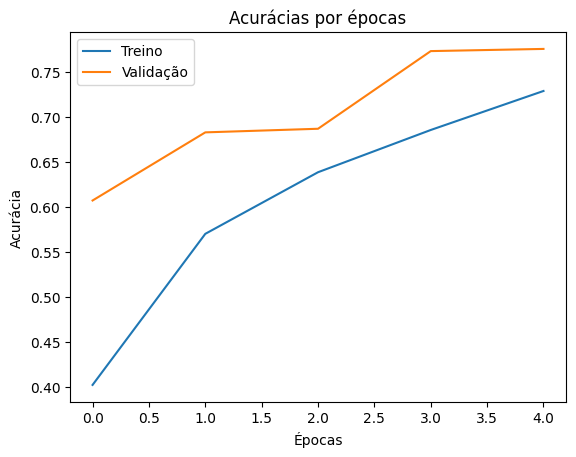

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácias por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

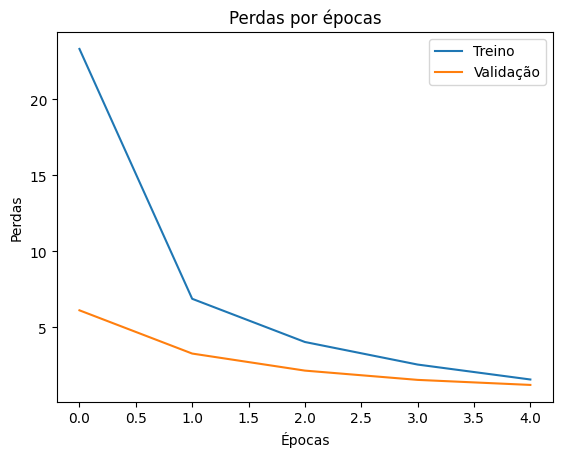

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino', 'Validação'])

Com essas saídas de gráficos conseguimos entender que a nossa rede precisa fazer um ajuste no treinamento. Ela está servindo tão pouco para o treino que ela está underfit(está encaixando pouco) nos dados de treino então ela precisa aprender o bastante para entender dados novos de validação. Então precisamos decidir o quanto a gente treina nossa rede.
Observando os gráficos vimos que as quebras ocorreram a partir da época 10 em ambos os gráficos. Então vamos treinar nossa rede por mais 5 vezes = 10.
Ao final da análise vimos que a melhor opção é manter as épocas 5 vezes.

Mas, precisamos de outra técnica para melhorar nosso modelo, pois, ele continua com as validações ruins.
A técnica consiste em deixar alguns neurônios ''dormentes''lá nas nossas camadas vamos acrescentar os dropout.
Após usarmos a técnica do dropout, obtivemos um retorno bem mais satisfatório que pode ser visualizado nos nossos gráficos acima.
Então, podemos concluir que nosso modelo está funcionando bem. Próximo passo é salvá-lo.

In [ ]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Ze